In [1]:
from functions import *
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import shap
from collections import Counter

## Data Preprocessing

In [2]:
path_1 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL1.csv"
path_2 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL2.csv"
path_3 = "/Users/rajwaghela/Library/CloudStorage/GoogleDrive-rajwaghela4244@gmail.com/My Drive/Thesis/Practical/Data/Dataset/THL3.csv"

THL_1 = pd.read_csv(path_1, sep=';')
THL_1.drop(columns=['Unnamed: 0'], inplace=True)
THL_2 = pd.read_csv(path_2, sep=';')
THL_2.drop(columns=['Unnamed: 0'], inplace=True)
THL_3 = pd.read_csv(path_3, sep=',')


In [3]:
## set modules
module1 = ['M01_1_N', 'M02_1_N', 'M03_1_N', 'M04_1_N', 'M05_1_N', 'M06_1_N']

module2 = [
            'M01_2_N', 'M02_2_N', 'M03_2_N', 'M04_2_N', 'M05_2_N', 'M06_2_N',
            'M07_2_N', 'M08_2_N', 'M09_2_N', 'M10_2_N', 'M11_2_N', 'M12_2_N',]

module3 = ['M01_3_N', 'M02_3_N', 'M03_3_N', 'M04_3_N', 'M05_3_N', 'M06_3_N',
            'M07_3_N', 'M08_3_N', 'M09_3_N', 'M10_3_N', 'M11_3_N', 'M12_3_N',
            'M13_3_N', 'M14_3_N', 'M15_3_N', 'M16_3_N', 'M17_3_N']

### Train test split function

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

def split_df(df, features):
    X = df[features]  # Feature matrix
    y = df["status"]  # Target variable

    # Initialize StratifiedShuffleSplit with one split
    strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

    # Generate indices for training and testing sets
    for train_index, test_index in strat_split.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    return X_train, X_test, y_train, y_test

### Search Space / Param Grid 

In [5]:
from hyperopt import *
search_space = {
    'n_estimators': hp.choice('n_estimators', list(range(5, 100, 5))),  # Number of boosting rounds
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.8),  # Step size shrinkage
    'booster': hp.choice('booster', ['gbtree']),
    'max_depth': hp.choice('max_depth', list(range(4, 12))),  # Tree depth
    'subsample': hp.uniform('subsample', 0.4, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.01, 0.3),  # L2 regularization term on weights
    'min_child_weight': hp.uniform('min_child_weight', 0.1, 2),  # Minimum sum of instance weight in a child
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.1 , 2.5),  # Balancing class weights for imbalanced dat
}


## THL semester 1

In [6]:
# Count occurrences of each unique value in the 'status' column
counter_1 = Counter(THL_1['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_1[1]} | 0: {counter_1[0]}')

hpo = ModelTrainer(random_state=42)
x1, y1 = hpo.split_data(THL_1, module1)

Quantity of Drop Out and Degree in THL-1: 
 1: 423 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:05<00:00,  1.68trial/s, best loss: -0.7516315481416447]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            02               09
	 actual 1            07               78

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8393006205170533, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.592976714092711, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 6, 'max_leaves': None, 'min_child_weight': 1.6003687331059409, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.23126961743793983, 'sa

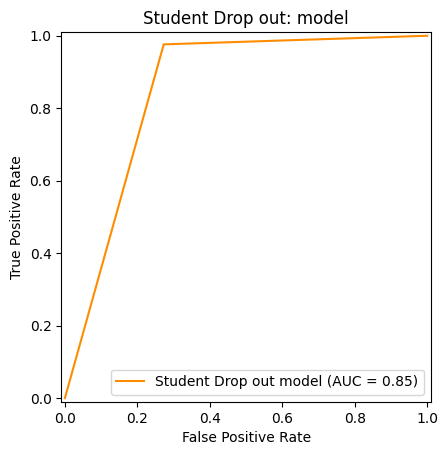

In [7]:
models_1, feature_importance1 = hpo.cross_validation_hpo(
    x=x1, y=y1,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [8]:
feature_importance1

,Feature,Importance
3,M04_1_N,0.283375
5,M06_1_N,0.166624
1,M02_1_N,0.145324
4,M05_1_N,0.140455
2,M03_1_N,0.138506
0,M01_1_N,0.125716


#### Shap analysis

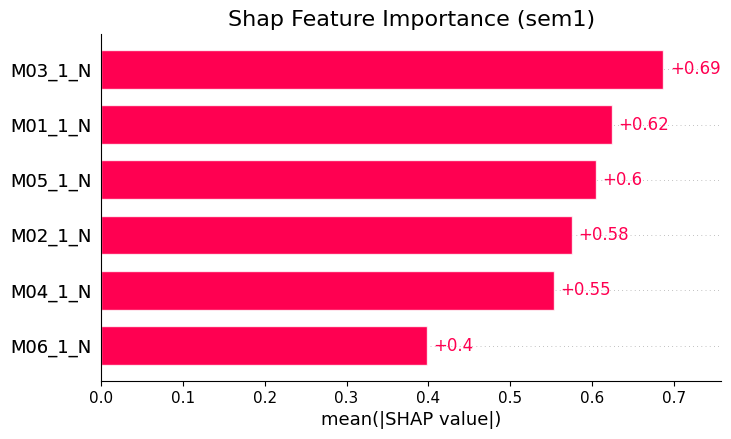

In [9]:
## Shap Global explainations
import shap
explainer = shap.Explainer(models_1['model'], models_1['x_train'])
shap_values = explainer(models_1['x_test'])

plt.title('Shap Feature Importance (sem1)', fontsize=16)
shap.plots.bar(shap_values)

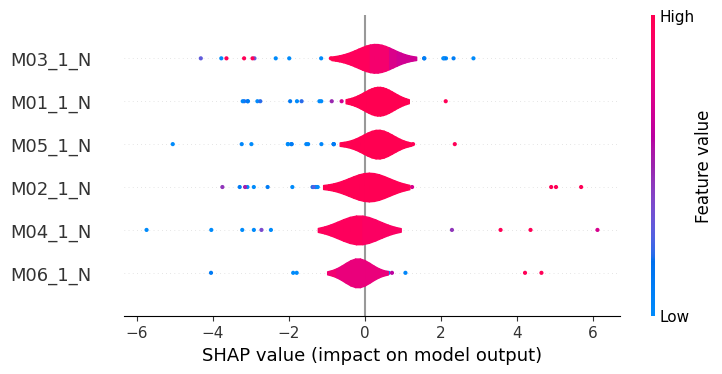

In [10]:
shap.plots.violin(shap_values, show=True)

In [11]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values, link='logit')

In [12]:
hpo.plot_shap_force(model=models_1,
           shap_values=shap_values, 
           student_index=29, model_name='xgb')

Student index 29 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


In [13]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=11, model_name='xgb')

Student index 11 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


In [14]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=39, model_name='xgb')

Student index 39 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


In [15]:
hpo.plot_shap_force(model=models_1, 
           shap_values=shap_values, 
           student_index=46, model_name='xgb')

Student index 46 grades:
         grades
M01_1_N     5.1
M02_1_N     5.1
M03_1_N     5.1
M04_1_N     5.1
M05_1_N     5.1
M06_1_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


## THL semester 2 

In [16]:
# Count occurrences of each unique value in the 'status' column
counter_2 = Counter(THL_2['status'])
print(f'Quantity of Drop Out and Degree in THL-2: \n 1: {counter_2[1]} | 0: {counter_2[0]}')
hpo2 = ModelTrainer(random_state=72)
x2, y2 = hpo2.split_data(THL_2, module2)

Quantity of Drop Out and Degree in THL-2: 
 1: 256 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:04<00:00,  2.25trial/s, best loss: -0.7490989159891599]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            05               05
	 actual 1            03               49

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5251142243122997, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.2793358763290429, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1.8692080332587582, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 72, 'reg_alpha': None, 'reg_lambda': 0.24324018886047283, 's

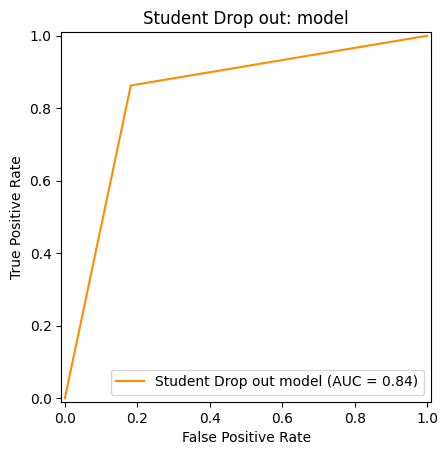

In [17]:
models_2, feature_importance2 = hpo2.cross_validation_hpo(
    x=x2, y=y2,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [18]:
feature_importance2

,Feature,Importance
10,M11_2_N,0.302620
7,M08_2_N,0.153862
6,M07_2_N,0.129865
8,M09_2_N,0.077784
5,M06_2_N,0.063096
1,M02_2_N,0.058284
0,M01_2_N,0.052822
2,M03_2_N,0.044983
3,M04_2_N,0.043898
9,M10_2_N,0.041072


#### Shap analysis

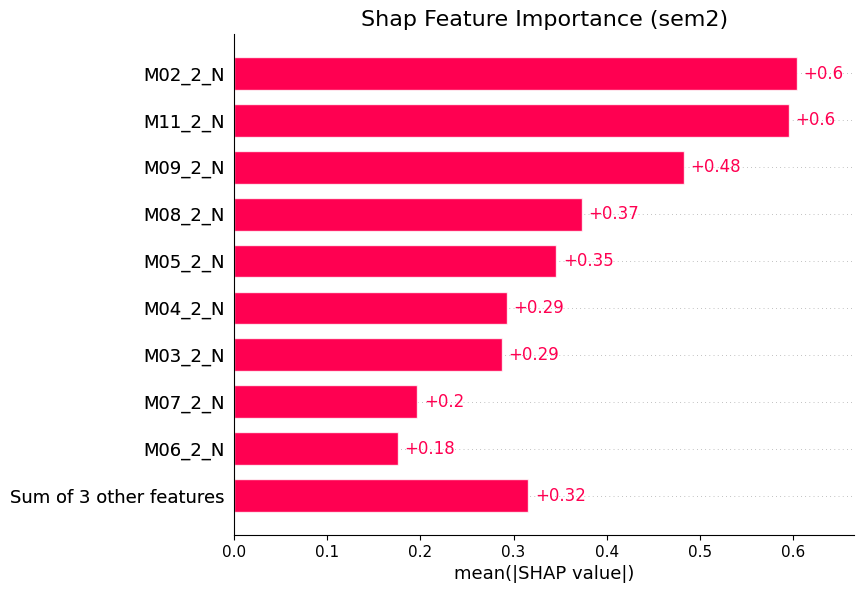

In [19]:
## Shap Global explainations
import shap
explainer2 = shap.Explainer(models_2['model'], models_2['x_train'])
shap_values2 = explainer2(models_2['x_test'])

plt.title('Shap Feature Importance (sem2)', fontsize=16)
shap.plots.bar(shap_values2)

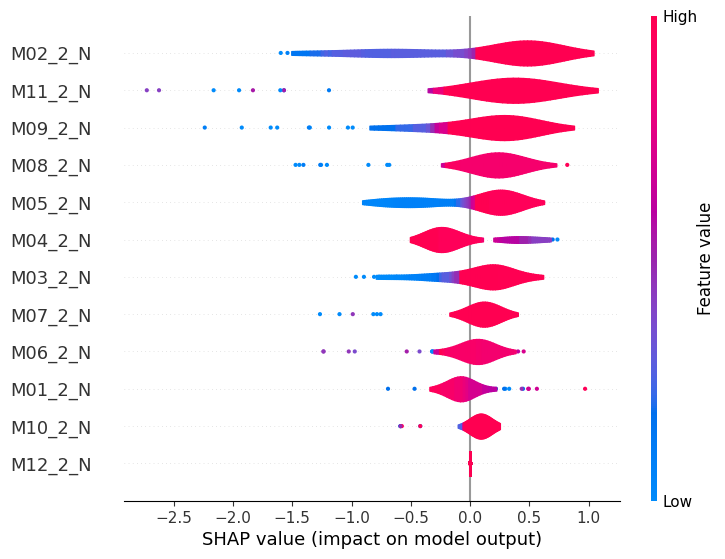

In [20]:
shap.plots.violin(shap_values2, show=True)

In [21]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values2, link='logit')

In [22]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=20, link='logit', model_name='xgb')

Student index 20 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


In [23]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=5,  model_name='xgb')

Student index 5 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


In [24]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=6, model_name='xgb')

Student index 6 grades:
         grades
M01_2_N     2.3
M02_2_N     4.0
M03_2_N     1.7
M04_2_N     1.0
M05_2_N     2.0
M06_2_N     2.7
M07_2_N     5.1
M08_2_N     1.7
M09_2_N     2.3
M10_2_N     5.0
M11_2_N     1.3
M12_2_N     5.1
Status: 1, Prediction: [0], Probability [0]: 0.971, Probability [1]: 0.029


In [25]:
hpo2.plot_shap_force(model=models_2, 
           shap_values=shap_values2, 
           student_index=10, model_name='xgb')

Student index 10 grades:
         grades
M01_2_N     5.1
M02_2_N     5.1
M03_2_N     5.1
M04_2_N     5.1
M05_2_N     5.1
M06_2_N     5.1
M07_2_N     5.1
M08_2_N     5.1
M09_2_N     5.1
M10_2_N     5.1
M11_2_N     5.1
M12_2_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.013, Probability [1]: 0.987


## THL semester 3

In [26]:
# Count occurrences of each unique value in the 'status' column
counter_3 = Counter(THL_3['status'])
print(f'Quantity of Drop Out and Degree in THL-1: \n 1: {counter_3[1]} | 0: {counter_3[0]}')

hpo3 = ModelTrainer(random_state=42)
x3, y3 = hpo3.split_data(THL_3, module3)

Quantity of Drop Out and Degree in THL-1: 
 1: 168 | 0: 54


------------------------------------- Fold 1 --------------------------------------------------
100%|██████████| 10/10 [00:03<00:00,  2.52trial/s, best loss: -0.8633190883190883]

Confusion Matrix
	                 predicted 0     predicted 1
	 actual 0            08               03
	 actual 1            05               29

Model parameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': 'gbtree', 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.5672451560299392, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.7468914900605975, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': 1.3236182781574848, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': 0.18033334936728546, 's

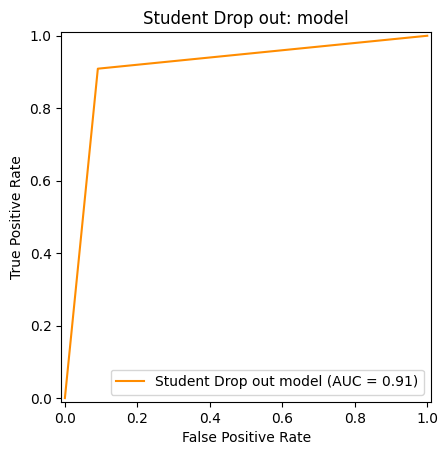

In [27]:
models_3, feature_importance3 = hpo3.cross_validation_hpo(
    x=x3, y=y3,
    search_space=search_space, 
    folds=5,
    algo='xgb'
    )

In [28]:
feature_importance3

,Feature,Importance
9,M10_3_N,0.177322
15,M16_3_N,0.161788
6,M07_3_N,0.100314
7,M08_3_N,0.095704
5,M06_3_N,0.076066
16,M17_3_N,0.075832
13,M14_3_N,0.068099
8,M09_3_N,0.045833
1,M02_3_N,0.043762
0,M01_3_N,0.042964


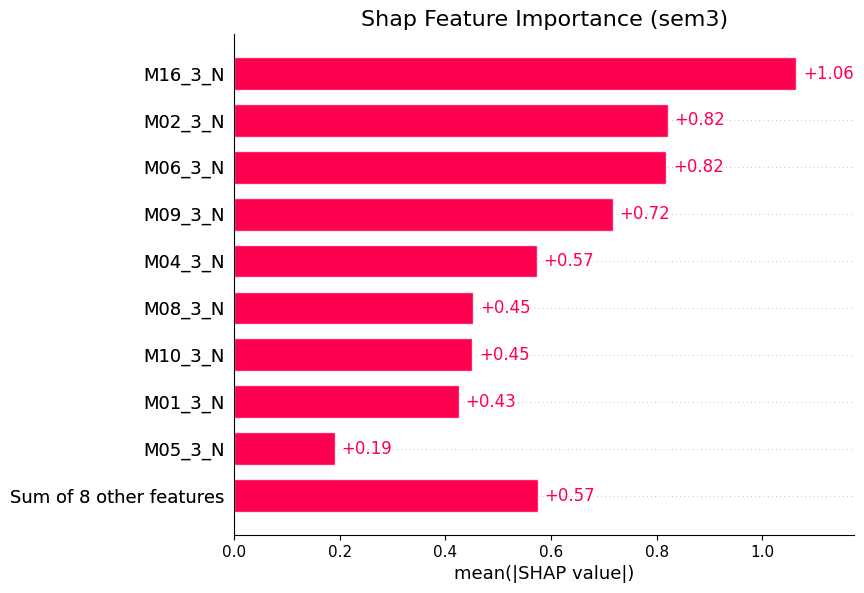

In [29]:
## Shap Global explainations
import shap
explainer3 = shap.Explainer(models_3['model'], models_3['x_train'])
shap_values3 = explainer3(models_3['x_test'])

plt.title('Shap Feature Importance (sem3)', fontsize=16)
shap.plots.bar(shap_values3)

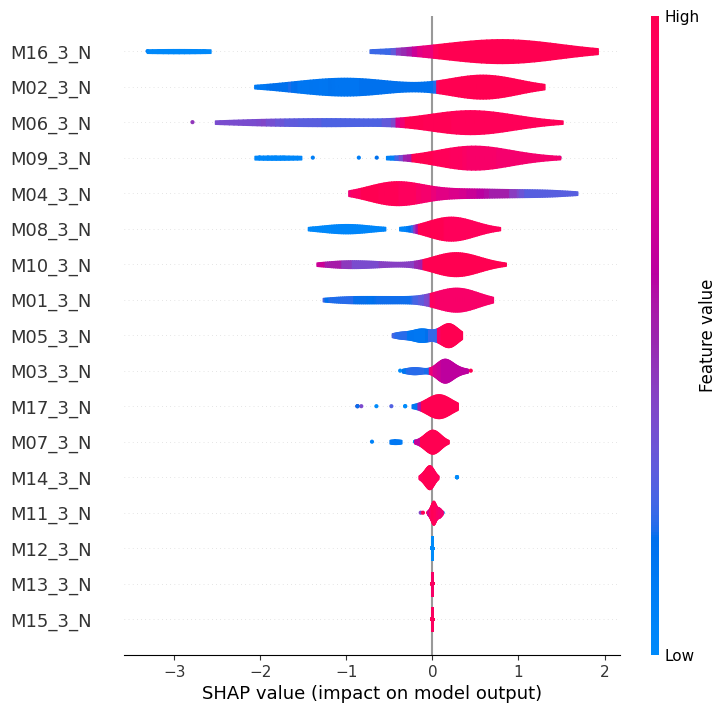

In [30]:
shap.plots.violin(shap_values3, show=True)

In [31]:
## Local explainations
shap.initjs()
shap.force_plot(shap_values3, link='logit')

In [32]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=1, model_name='xgb')

Student index 1 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.005, Probability [1]: 0.995


In [33]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=9, model_name='xgb')

Student index 9 grades:
         grades
M01_3_N     3.0
M02_3_N     2.3
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     2.7
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     3.7
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     1.3
Status: 1, Prediction: [1], Probability [0]: 0.437, Probability [1]: 0.563


In [34]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=3, model_name='xgb')

Student index 3 grades:
         grades
M01_3_N     4.0
M02_3_N     5.1
M03_3_N     2.7
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.0
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     3.3
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.002, Probability [1]: 0.998


In [35]:
hpo3.plot_shap_force(model=models_3, 
           shap_values=shap_values3, 
           student_index=10, model_name='xgb')

Student index 10 grades:
         grades
M01_3_N     5.1
M02_3_N     5.1
M03_3_N     5.1
M04_3_N     5.1
M05_3_N     5.1
M06_3_N     5.1
M07_3_N     5.1
M08_3_N     5.1
M09_3_N     5.1
M10_3_N     5.1
M11_3_N     5.1
M12_3_N     5.1
M13_3_N     5.1
M14_3_N     5.1
M15_3_N     5.1
M16_3_N     5.1
M17_3_N     5.1
Status: 1, Prediction: [1], Probability [0]: 0.005, Probability [1]: 0.995
